In [1]:
import numpy as np
from numpy import pi
from qutip import Qobj, about
from qutip_qip.circuit import QubitCircuit
from itertools import product
#from qutip import tensor, basis, qeye, Qobj
from qutip_qip.operations import (Gate, berkeley, cnot, cphase, csign, fredkin,
                                  gate_sequence_product, globalphase, iswap,
                                  molmer_sorensen, phasegate, qrot, rx, ry, rz,
                                  snot, sqrtiswap, sqrtnot, sqrtswap, swap,
                                  swapalpha, toffoli)
from qutip import *
from qutip.qip.circuit import QubitCircuit
from itertools import product
import qutip as qt
import numpy as np

#%matplotlib inline

In [2]:
import qutip
print(qutip.__version__)

4.7.3


C:\Users\43491\AppData\Local\Temp\ipykernel_21832\4251214716.py:19: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(N=num_qubits)


Matrix representation of the CRZ gate:
Quantum object: dims = [[2, 2, 2, 2], [2, 2, 2, 2]], shape = (16, 16), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

C:\Users\43491\anaconda3\envs\qutip-env\lib\site-packages\qutip\qip\circuit.py:242: UserWarning: Unknown gate CtrlR_kGate
  warnings.warn("Unknown gate %s" % name)


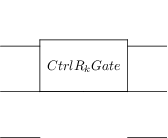

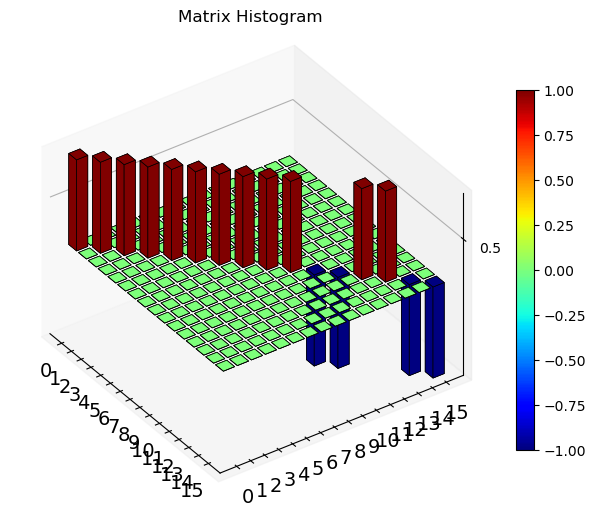

In [3]:
import numpy as np
from qutip import QubitCircuit, Gate
from qutip import Qobj, matrix_histogram
import base64
from PIL import Image
import io

def CTRL_Rk_gate(arg_value):
    # Control R_k gate
    mat = np.zeros((4,4), dtype = complex)
    mat[0,0] = mat[1,1] = mat[2,2] = 1
    mat[3,3] = np.exp(-1j * 2 * np.pi / 2**arg_value)
    return Qobj(mat, dims=[[2,2],[2,2]])


num_qubits = 4

# Create a quantum circuit
qc = QubitCircuit(N=num_qubits)
qc.user_gates = {"CtrlR_kGate":CTRL_Rk_gate}



# Add the CRZ gate
#qc.add_gate("X", targets=[0])
#qc.add_gate("X", targets=[0])
#qc.add_gate("X", targets=[1])
#qc.add_gate("CRZ", targets=[1], controls=[0], arg_value=3*pi)
qc.add_gate("CtrlR_kGate", targets=[0,2],arg_value=1)
# Obtain the unitary matrix of the circuit
unitary_matrix = qc.propagators()
# Multiply the matrices to get the full unitary of the circuit
# Ensure to do this in the correct order
full_unitary = unitary_matrix[-1]
for U in reversed(unitary_matrix[:-1]):
    full_unitary = full_unitary * U

# Generate the histogram
fig, ax = matrix_histogram(full_unitary, title="Matrix Histogram")

# Print out the matrix representation
print("Matrix representation of the CRZ gate:")
print(unitary_matrix[0])  # Assuming CRZ is the last gat9*e added
# Access the png property to get the image
qc.png

# QBNN Sin

## Gates defined

In [4]:
def CTRL_Rk_dagger(arg_value):
    # Control R_k gate used in PE
    mat = np.zeros((4,4), dtype = complex)
    mat[0,0] = mat[1,1] = mat[2,2] = 1
    mat[3,3] = np.exp(-1j * 2 * np.pi / 2**arg_value)
    return Qobj(mat, dims=[[2,2],[2,2]])

def CTRL_Rk(arg_value):
    # Control R_k gate used in PE
    mat = np.zeros((4,4), dtype = complex)
    mat[0,0] = mat[1,1] = mat[2,2] = 1
    mat[3,3] = np.exp(1j * 2 * np.pi / 2**arg_value)
    return Qobj(mat, dims=[[2,2],[2,2]])

def CHadamard(arg_value = 0):
    # Control R_k gate used in PE
    mat = np.zeros((4,4), dtype = complex)
    mat[0,0] = mat[1,1] = 1
    mat[2,3] = mat[3,2] = mat[2,2] = 1/np.sqrt(2)
    mat[3,3] = -1/np.sqrt(2)

    return Qobj(mat, dims=[[2,2],[2,2]])

def SetPhase(arg_value):
    # Give control phase when the control qubit is |1>
    mat = np.zeros((4,4), dtype = complex)
    mat[0,0] = mat[1,1] = 1
    mat[2,2] = mat[3,3] = np.exp(arg_value*1j)
    return Qobj(mat, dims=[[2,2],[2,2]])

def Multi_SetPhase(arg_value):
    # Give control phase when the control qubit is |1>
    mat = np.zeros((8,8), dtype = complex)
    for i in range(8):
        mat[i,i]= 1
    mat[6,6]= mat[7,7] = np.exp(arg_value*1j)
    return Qobj(mat, dims=[[2,2,2],[2,2,2]])

def MultiTof(arg_value):
    # Multi-control NOT gate
    mat = np.zeros((2**(arg_value+1),2**(arg_value+1)), dtype = complex)
    
    for i in range(2**(arg_value+1)-2):
        mat[i,i] = 1

    mat[2**(arg_value+1)-1,2**(arg_value+1)-2] = mat[2**(arg_value+1)-2,2**(arg_value+1)-1] = 1
    
    setdim = []
    for i in range(arg_value+1):
        
        setdim.append(2)

    return Qobj(mat, dims=[setdim,setdim])



def CMultiSum(arg_value):
    control_state = '1' +arg_value

    # Basis states for 0 and 1
    b0 = basis(2, 0)
    b1 = basis(2, 1)

    # Total number of qubits (control bits + 1 target bit)
    num_qubits = len(control_state) + 1

    # Identity matrix for the whole system
    identity = tensor([qeye(2) for _ in range(num_qubits)])

    # Create the tensor product states for the given control state with 0 and 1 appended
    control_tensor_0 = tensor([b1 if bit == '1' else b0 for bit in control_state] + [b0])  # |...0>
    control_tensor_1 = tensor([b1 if bit == '1' else b0 for bit in control_state] + [b1])  # |...1>

    # Outer products for the specified transitions
    outer_product_01 = control_tensor_0 * control_tensor_1.dag()  # |...0><...1|
    outer_product_10 = control_tensor_1 * control_tensor_0.dag()  # |...1><...0|

    # Create the full gate
    full_gate = identity - control_tensor_0 * control_tensor_0.dag() - control_tensor_1 * control_tensor_1.dag() + outer_product_01 + outer_product_10
    #setdim = []
    #for i in range(num_qubits):
        
        #setdim.append(2)
    return full_gate
    #return Qobj(full_gate, dims=[setdim,setdim])

def CMultiVariSum(arg_value):
    control_state = arg_value

    # Basis states for 0 and 1
    b0 = basis(2, 0)
    b1 = basis(2, 1)

    # Total number of qubits (control bits + 1 target bit)
    num_qubits = len(control_state) + 1

    # Identity matrix for the whole system
    identity = tensor([qeye(2) for _ in range(num_qubits)])

    # Create the tensor product states for the given control state with 0 and 1 appended
    control_tensor_0 = tensor([b1 if bit == '1' else b0 for bit in control_state] + [b0])  # |...0>
    control_tensor_1 = tensor([b1 if bit == '1' else b0 for bit in control_state] + [b1])  # |...1>

    # Outer products for the specified transitions
    outer_product_01 = control_tensor_0 * control_tensor_1.dag()  # |...0><...1|
    outer_product_10 = control_tensor_1 * control_tensor_0.dag()  # |...1><...0|

    # Create the full gate
    full_gate = identity - control_tensor_0 * control_tensor_0.dag() - control_tensor_1 * control_tensor_1.dag() + outer_product_01 + outer_product_10
    #setdim = []
    #for i in range(num_qubits):
        
        #setdim.append(2)
    return full_gate
    #return Qobj(full_gate, dims=[setdim,setdim])

def TwoSinSum(arg_value):
    binary_list = ['01', '00', '10', '11']
    singletrans=[]
    for i in binary_list:
        for j in binary_list:
            #print(np.outer(binary_to_state_vector(i+j+'111'),binary_to_state_vector(i+j+'111')))
            trans = np.outer(binary_to_state_vector(i + j + binary_addition(i, j)), binary_to_state_vector(i+j+'000'))
            singletrans.append(trans)
            sinsum = sum(singletrans)
            #print(trans)
            #row_bin, col_bin = find_nonzero_binary(trans)
            #print("Row in binary:", row_bin)
            #print("Column in binary:", col_bin)
            
    return Qobj(sinsum, dims=[[2,2,2,2,2,2,2],[2,2,2,2,2,2,2]])

#def CTwoSinSum(arg_value):
    #binary_list = ['01', '00', '10', '11']
    #singletrans=[]
    #for i in binary_list:
        #for j in binary_list:
            #trans = np.outer(binary_to_state_vector(i + j + binary_addition(i, j)), binary_to_state_vector(i+j+'000'))
            #singletrans.append(trans)
            #sinsum = sum(singletrans)
    #dim = sinsum.shape[0]
    #CSum = np.zeros((2*dim, 2*dim), dtype=complex)
    #np.fill_diagonal(CSum, 1)
    #CSum[dim:, dim:] = sinsum
            
    #return Qobj(CSum, dims=[[2,2,2,2,2,2,2,2],[2,2,2,2,2,2,2,2]])

def CTwoSinSum(arg_value):
    CTwoSum = arg_value
    return Qobj(CTwoSum, dims=[[2,2,2,2,2,2,2,2],[2,2,2,2,2,2,2,2]])

def C3BitsTwoSinSum(arg_value):
    CSum = arg_value   
    return Qobj(CSum, dims=[[2,2,2,2,2,2,2,2,2,2,2],[2,2,2,2,2,2,2,2,2,2,2]])
    



## Fast reading!

C:\Users\43491\AppData\Local\Temp\ipykernel_2200\4225415780.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(4)
C:\Users\43491\anaconda3\envs\qutip-env\lib\site-packages\qutip\qip\circuit.py:242: UserWarning: Unknown gate CMultiSum
  warnings.warn("Unknown gate %s" % name)


Final state (density matrix) of qubit 4:
 Quantum object: dims = [[2, 2, 2], [2, 2, 2]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


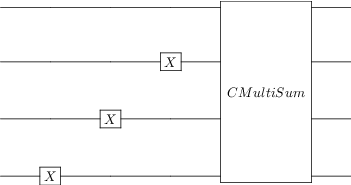

In [5]:
#test CMultiSum(arg_value)
# Create a quantum circuit
qc = QubitCircuit(4)
# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum}
qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[1])
qc.add_gate("X", targets=[2])
qc.add_gate("CMultiSum", targets=[0, 1, 2, 3], arg_value="11")

initial_state = tensor([basis(2, 0), basis(2, 0), basis(2, 0), basis(2, 0)])  # All qubits in |0>

# Simulate the circuit
final_state = qc.run(initial_state)

# Check the final state of qubit 4
# Here we measure or analyze the reduced state of qubit 3 (indexing starts from 0)
qubit_4_state = final_state.ptrace([0,1,2])  # ptrace to get the reduced density matrix of the last qubit
print("Final state (density matrix) of qubit 4:\n", qubit_4_state)
qc.png

# Main

## Number of Qubits setting

In [5]:
# Number of qubits (in order of qubits)
n_PE = 2
n_weight = 2
n_input = 6
#n_z = 4
#transform n_z by n_input
n_sum = 3
n_output = 2
#transform n_output by n_sum
n_target = 2
n_ancilla = 3
n_qubits = n_PE + n_weight + n_input + n_sum + n_target + n_ancilla

# Activation funciton threshold setting

num_input_neuron = n_input
num_activate = 2

In [6]:
from qutip import QubitCircuit

def DataEmbed(qc,PE_index, input_target, num_output, input_starting_index, target_starting_index):
    """
    Apply 'X' gates based on the provided tuple of states, skipping 'y' qubits in the middle.

    """
    input = input_target[:len(input_target)-num_output]  # Gates for the input
    target = input_target[-num_output:]  # Gates for the target

    # Apply 'X' gates for the input
    for idx, state in enumerate(input):
        if state == 1:
            qc.add_gate("CNOT", controls=[PE_index], targets=[idx + input_starting_index])
            qc.add_gate("CNOT", controls=[PE_index], targets=[3 + idx + input_starting_index])

    # Apply 'X' gates for the target
    for idx, state in enumerate(target):
        if state == 1:
            qc.add_gate("CNOT", controls=[PE_index], targets=[idx+ target_starting_index])


In [7]:
# Functions used 
def apply_iqft(qc, start_qubit, end_qubit):
    """Apply Inverse Quantum Fourier Transform to the specified qubits."""
    i = end_qubit - start_qubit + 1
    while i >= 2:
        qc.add_gate("CtrlR_kDagger", targets=[start_qubit,end_qubit],arg_value=i)
        i = i - 1
        start_qubit = start_qubit + 1
    qc.add_gate("SNOT", targets=[end_qubit])

def apply_iqft_inverse(qc, start_qubit, end_qubit):
    """Apply Inverse Quantum Fourier Transform to the specified qubits."""
    qc.add_gate("SNOT", targets=[start_qubit])
    k = start_qubit - end_qubit + 1
    i = 2
    while i <= k:
        qc.add_gate("CtrlR_k", targets=[start_qubit - i + 1,start_qubit],arg_value=i)
        i = i + 1

def apply_weight(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set):
    """
    Apply the weights to inputs.
    """
    for i in range(0,len(control_qubit_set)):       
        qc.add_gate("TOFFOLI", controls=[pe_qubit_index, control_qubit_set[i]], targets=[applyto_qubit_set[i]])

def apply_weight_inverse(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set):
    """
    Undo the weights to inputs.
    """
    for i in range(len(control_qubit_set)-1, -1, -1):       
        qc.add_gate("TOFFOLI", controls=[pe_qubit_index, control_qubit_set[i]], targets=[applyto_qubit_set[i]])
        

def input_unit(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set, output_qubit_index, n_PE, phase_add, limit):
    
    apply_weight(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)
    
    result = limit
    
    for i in result:
        qc.add_gate("CMultiSum", targets=[pe_qubit_index, applyto_qubit_set[0], applyto_qubit_set[1], applyto_qubit_set[1]+1], arg_value=i)

        
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-3], targets=[n_qubits-1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-2], targets=[n_qubits-1])
    qc.add_gate("MultiSetPhase", targets=[pe_qubit_index, n_qubits-1, n_PE], arg_value= phase_add)
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-2], targets=[n_qubits-1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-3], targets=[n_qubits-1])
    
    for j in reversed(result):
        qc.add_gate("CMultiSum", targets=[pe_qubit_index, applyto_qubit_set[0], applyto_qubit_set[1], applyto_qubit_set[1]+1], arg_value=j)

    apply_weight_inverse(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)


def input_sin_unit(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set, sinsum_set, CSum, threebitresult_index, n_PE, n_qubits, phase_add):
    
    apply_weight(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)

    # turn sin results to 2bits
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[0]], targets=[applyto_qubit_set[0] + 1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[1]], targets=[applyto_qubit_set[1] + 1])
    
    #sin results sum
    qc.add_gate("CTwoSinSum", targets=sinsum_set, arg_value= CSum)

    # turn 3 bits (-2,2) sin result to 2 bits
    # take 3 bits' 1 & 3 as 2 bits
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index+ 1], targets=[threebitresult_index + 2])

    # compare
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 3], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 2], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 4], targets=[n_qubits-2])

    qc.add_gate("MultiTof", targets=[pe_qubit_index, n_qubits-3, n_qubits-2, n_qubits-1 ], arg_value= 3)

    qc.add_gate("MultiSetPhase", targets=[pe_qubit_index, n_qubits-1, n_PE], arg_value= phase_add)

    # reverse
    qc.add_gate("MultiTof", targets=[pe_qubit_index, n_qubits-3, n_qubits-2, n_qubits-1 ], arg_value= 3)    


    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 4], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 2], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 3], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index], targets=[n_qubits-3])


    # reverse
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index+ 1], targets=[threebitresult_index + 2])

    # reverse
    qc.add_gate("CTwoSinSum", targets=sinsum_set, arg_value= CSum.conj().T)

    # reverse
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[1]], targets=[applyto_qubit_set[1] + 1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[0]], targets=[applyto_qubit_set[0] + 1])

    apply_weight_inverse(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)

def input_sin_inverse_unit(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set, sinsum_set, CSum, threebitresult_index, n_PE, n_qubits, phase_add):

    apply_weight_inverse(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)


    # turn sin results to 2bits
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[0]], targets=[applyto_qubit_set[0] + 1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[1]], targets=[applyto_qubit_set[1] + 1])
    
    #sin results sum
    qc.add_gate("CTwoSinSum", targets=sinsum_set, arg_value= CSum)

    # turn 3 bits (-2,2) sin result to 2 bits
    # take 3 bits' 1 & 3 as 2 bits
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index+ 1], targets=[threebitresult_index + 2])

    # compare
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 3], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 2], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 4], targets=[n_qubits-2])

    qc.add_gate("MultiTof", targets=[pe_qubit_index, n_qubits-3, n_qubits-2, n_qubits-1 ], arg_value= 3)

    qc.add_gate("MultiSetPhase", targets=[pe_qubit_index, n_qubits-1, n_PE], arg_value= -1*phase_add)

    # reverse
    qc.add_gate("MultiTof", targets=[pe_qubit_index, n_qubits-3, n_qubits-2, n_qubits-1 ], arg_value= 3)    


    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 4], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 2], targets=[n_qubits-2])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index + 3], targets=[n_qubits-3])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index], targets=[n_qubits-3])


    # reverse
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, threebitresult_index+ 1], targets=[threebitresult_index + 2])

    # reverse
    qc.add_gate("CTwoSinSum", targets=sinsum_set, arg_value= CSum.conj().T)

    # reverse
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[1]], targets=[applyto_qubit_set[1] + 1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, applyto_qubit_set[0]], targets=[applyto_qubit_set[0] + 1])

    apply_weight(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)
                         
def input_unit_inverse(qc, pe_qubit_index, control_qubit_set, applyto_qubit_set, output_qubit_index,n_PE, phase_add, limit):
    
    apply_weight(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)
    
    result = limit
    
    for i in result:
        qc.add_gate("CMultiSum", targets=[pe_qubit_index, applyto_qubit_set[0], applyto_qubit_set[1], applyto_qubit_set[1]+1], arg_value=i)

        
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-3], targets=[n_qubits-1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-2], targets=[n_qubits-1])
    qc.add_gate("MultiSetPhase", targets=[pe_qubit_index, n_qubits-1, n_PE], arg_value= -1*phase_add)
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-2], targets=[n_qubits-1])
    qc.add_gate("TOFFOLI", controls=[pe_qubit_index, n_qubits-3], targets=[n_qubits-1])
    
    for j in reversed(result):
        qc.add_gate("CMultiSum", targets=[pe_qubit_index, applyto_qubit_set[0], applyto_qubit_set[1], applyto_qubit_set[1]+1], arg_value=j)
        
    apply_weight_inverse(qc, pe_qubit_index=pe_qubit_index, control_qubit_set=control_qubit_set, applyto_qubit_set=applyto_qubit_set)
    


def get_combined_qubit_probabilities(state_vector, qubit_indices):
    num_qubits = int(np.log2(len(state_vector)))
    ## Dictionary of probabilities
    probabilities = {''.join(state): 0 for state in product('01', repeat=len(qubit_indices))}

    for state in range(len(state_vector)):
        binary_state = format(state, '0{}b'.format(num_qubits))

        probability = np.abs(state_vector[state])**2
        #print("prob")
        #print(probability)

        # Correcting the indexing for the combined state
        combined_state = ''.join(binary_state[i] for i in qubit_indices)
        probabilities[combined_state] += probability[0]

    threshold = 1e-10
    for key in probabilities.keys():
        if probabilities[key] < threshold:
            probabilities[key] = 0

    return probabilities

def generate_sequences(n, min_ones):
    # Generate all binary combinations of length n
    all_combinations = [''.join(map(str, seq)) for seq in product([0, 1], repeat=n)]
    
    # Filter combinations to include only those with at least min_ones '1's
    filtered_combinations = [seq for seq in all_combinations if seq.count('1') >= min_ones]
    
    return tuple(filtered_combinations)

def binary_addition(a, b):

    # Define the encoding for inputs and outputs
    input_mapping = {'00': 0, '01': 1, '10': 0, '11': -1}
    output_mapping = {0: '000', 1: '001', 2: '010', 3: '011',
                      -1: '101', -2: '110', -3: '111'}

    # Calculate the sum using the mapped values
    sum_value = input_mapping[a] + input_mapping[b]

    # Handle specific cases as per your rules
    # Adjust for +0 and -0 (both are '000')
    if sum_value in output_mapping:
        result = output_mapping[sum_value]
    else:
        # If sum is not in output mapping and not overflowed, use default error handling
        raise Exception("Sum is out of expected range!")
            
    return result

def ThreeBitsbinary_addition(a, b):

    # Define the encoding for inputs and outputs
    input_mapping = {'111': -3, '110': -2, '101': -1, '100': 0,'000':0, '001': 1, '010': 2, '011': 3}
    output_mapping = {0: '0000', 1: '0001', 2: '0010', 3: '0011', 4: '0100',5: '0101',6: '0110', 7: '0111',
                                -1: '1001', -2: '1010', -3: '1011', -4: '1100',-5: '1101', -6: '1110',-7: '1111'}

    # Calculate the sum using the mapped values
    sum_value = input_mapping[a] + input_mapping[b]

    # Handle specific cases as per your rules
    # Adjust for +0 and -0 (both are '000')
    if sum_value in output_mapping:
        result = output_mapping[sum_value]
    else:
        # If sum is not in output mapping and not overflowed, use default error handling
        raise Exception("Sum is out of expected range!")
            
    return result

def binary_to_state_vector(binary_string):
    """ Convert a binary string to a quantum state vector. """
    # Mapping from binary to quantum states
    mapping = {'0': np.array([1, 0]), '1': np.array([0, 1])}
    # Start with the state of the first qubit
    state_vector = mapping[binary_string[0]]
    # Tensor product for subsequent qubits
    for bit in binary_string[1:]:
        state_vector = np.kron(state_vector, mapping[bit])
    return state_vector


def find_nonzero_binary(matrix):
    # Find the indices of the non-zero element
    row, col = np.argwhere(matrix == 1)[0]
    # Convert these indices to binary
    row_binary = format(row, '010b')  # 10 bits for numbers up to 1024, 07b for 7 bits
    col_binary = format(col, '010b')
    return row_binary, col_binary

In [15]:
# data (first 3 input, last 2 target, for targer, no matter +0 or -0, put 00)
# This block is choosing how many data are used
data = ((0,0,0,0,0),(0,0,1,0,1),(0,1,0,0,0),(0,1,1,1,1))
#data = ((0,0,1,0,1),)
#data = ((0,0,0,0,0),(0,0,1,0,1))
len(data)

4

## If 3 Bit sum is used.

In [10]:
# 3bits + 3bits = 4 bits
# Use C3BitsTwoSinSum Faster
binary_list = ['011','010','001','000','100','101','110','111']
singletrans=[]
for i in binary_list:
    for j in binary_list:
        trans = np.outer(binary_to_state_vector(i + j + ThreeBitsbinary_addition(i, j)), binary_to_state_vector(i + j +'0000'))
        singletrans.append(trans)
        sinsum = sum(singletrans)
dim = sinsum.shape[0]
CSum = np.zeros((2*dim, 2*dim), dtype=complex)
np.fill_diagonal(CSum, 1)
CSum[dim:, dim:] = sinsum


## If 2 Bit sum is used.

In [9]:
# 2bits + 2bits = 3 bits
binary_list = ['01', '00', '10', '11']
singletrans=[]
for i in binary_list:
    for j in binary_list:
        trans = np.outer(binary_to_state_vector(i + j + binary_addition(i, j)), binary_to_state_vector(i+j+'000'))
        singletrans.append(trans)
        sinsum = sum(singletrans)
dim = sinsum.shape[0]
CSum = np.zeros((2*dim, 2*dim), dtype=complex)
np.fill_diagonal(CSum, 1)
CSum[dim:, dim:] = sinsum
            


# Modified Quantum Binary Neural Networks
STARTING HERE

In [16]:
#test CMultiSum(arg_value)
# Create a quantum circuit
qc = QubitCircuit(n_qubits)




# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "TwoSinSum":TwoSinSum,
                 "CTwoSinSum":CTwoSinSum,
                 "C3BitsTwoSinSum":C3BitsTwoSinSum}


# Set Hadamard Gates for PE 's phase registers & superpositions

for i in range(n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])

# Ancilla qubit initialization
qc.add_gate("X", targets=[n_qubits-3])
qc.add_gate("X", targets=[n_qubits-2])




# Set Phase Estimation

for i in range(n_PE):
    times_to_run = 2 ** i

    for _ in range(times_to_run):
        
        for j in range(0,len(data)):
            
            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )
            input_sin_unit(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,5,6,8,9,10,11,12], CSum= CSum, threebitresult_index =  n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubits=n_qubits, phase_add=(2*np.pi)*(0.125))
            #input_sin_unit(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           #sinsum_set=[n_PE-1-i,4,5,6,7,8,9,10,11,12,13], CSum= CSum, fourbitresult_index= n_PE + n_weight + n_input, 
                           #n_PE=n_PE, n_qubit=n_qubits, phase_add=(2*np.pi)*(0.5))
            

            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )

# IQFT part
initial = 0
while initial <= n_PE-1:        
    apply_iqft(qc, start_qubit= 0, end_qubit= initial)
    initial = initial + 1

initial_state = qt.tensor([qt.basis(2, 0) for _ in range(n_qubits)])  # n_qubits is the total number of qubits in the circuit
print(initial_state)
final_state = qc.run(state= initial_state)
initial_state2 = final_state
reduced_state = final_state.ptrace([0,1])  # Gets the reduced state for qubits 0 and 1
print("The phase accumulated before oracle{}".format(reduced_state))

# Oracle part
qc.add_gate("SetPhase", targets=[n_PE-1, n_PE], arg_value=((2*np.pi)*(0.5)))

# PE_dagger starts here!

# QFT part
initial_2 = 0
while initial_2 <= n_PE-1: 
    apply_iqft_inverse(qc, start_qubit= n_PE - 1 - initial_2, end_qubit= 0)
    initial_2 = initial_2 + 1

# Set Inverse Phase Estimation
#print(initial_state2)
#final_state2 = qc.run(state= initial_state2)
#initial_state3 = final_state2
#reduced_state2 = final_state2.ptrace([2,3])  # Gets the reduced state for qubits 0 and 1
#print("before inverPE{}".format(reduced_state2))

for i in range(n_PE - 1, -1, -1):
    times_to_run = 2 ** i
    for _ in range(times_to_run):
        for j in range(len(data)-1,-1,-1):
            
            DataEmbed(qc=qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )
            input_sin_inverse_unit(qc=qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,5,6,8,9,10,11,12], CSum= CSum, threebitresult_index =  n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubits=n_qubits, phase_add=(2*np.pi)*(0.125))
            DataEmbed(qc=qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )


# Inverse Hadamard for PE qubits
for i in range(0,n_PE):
    qc.add_gate("SNOT", targets=[i])

initial_state = qt.tensor([qt.basis(2, 0) for _ in range(n_qubits)])  # n_qubits is the total number of qubits in the circuit
print(initial_state)
final_state = qc.run(state= initial_state)
reduced_state = final_state.ptrace([2,3]) 
print("the weights before diffusion operator gives:{}".format(reduced_state))


# Diffusion operator

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])
    
for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])
    
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-3], arg_value= n_weight)    
qc.add_gate("SetPhase", targets=[n_qubits-3,n_PE], arg_value=(np.pi))
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-3], arg_value= n_weight)    

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])


#print(initial_state4)
#final_state4 = qc.run(state= initial_state4)

#reduced_state4 = final_state4.ptrace([2,3])  # Gets the reduced state for qubits 0 and 1
#print("weights give{}".format(reduced_state4))

initial_state = qt.tensor([qt.basis(2, 0) for _ in range(n_qubits)])  # n_qubits is the total number of qubits in the circuit
print(initial_state)
final_state = qc.run(state= initial_state)
reduced_state = final_state.ptrace([2,3]) 
print("the best weight gives:{}".format(reduced_state))
#qc.png


C:\Users\43491\AppData\Local\Temp\ipykernel_21832\3157832755.py:3: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(n_qubits)


Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (262144, 1), type = ket
Qobj data =
  (0, 0)	(1+0j)
The phase accumulated before oracleQuantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.   0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.75 0.  ]
 [0.   0.   0.   0.  ]]
Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], shape = (262144, 1), type = ket
Qobj data =
  (0, 0)	(1+0j)
the weights before diffusion operator gives:Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.25 -0.25 -0.25 -0.25]
 [-0.25  0.25  0.25  0.25]
 [-0.25  0.25  0.25  0.25]
 [-0.25  0.25  0.25  0.25]]
Quantum object: dims = [[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# Cut Version for plot

C:\Users\43491\AppData\Local\Temp\ipykernel_21832\457019347.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(n_qubits)
C:\Users\43491\anaconda3\envs\qutip-env\lib\site-packages\qutip\qip\circuit.py:242: UserWarning: Unknown gate CtrlR_k
  warnings.warn("Unknown gate %s" % name)


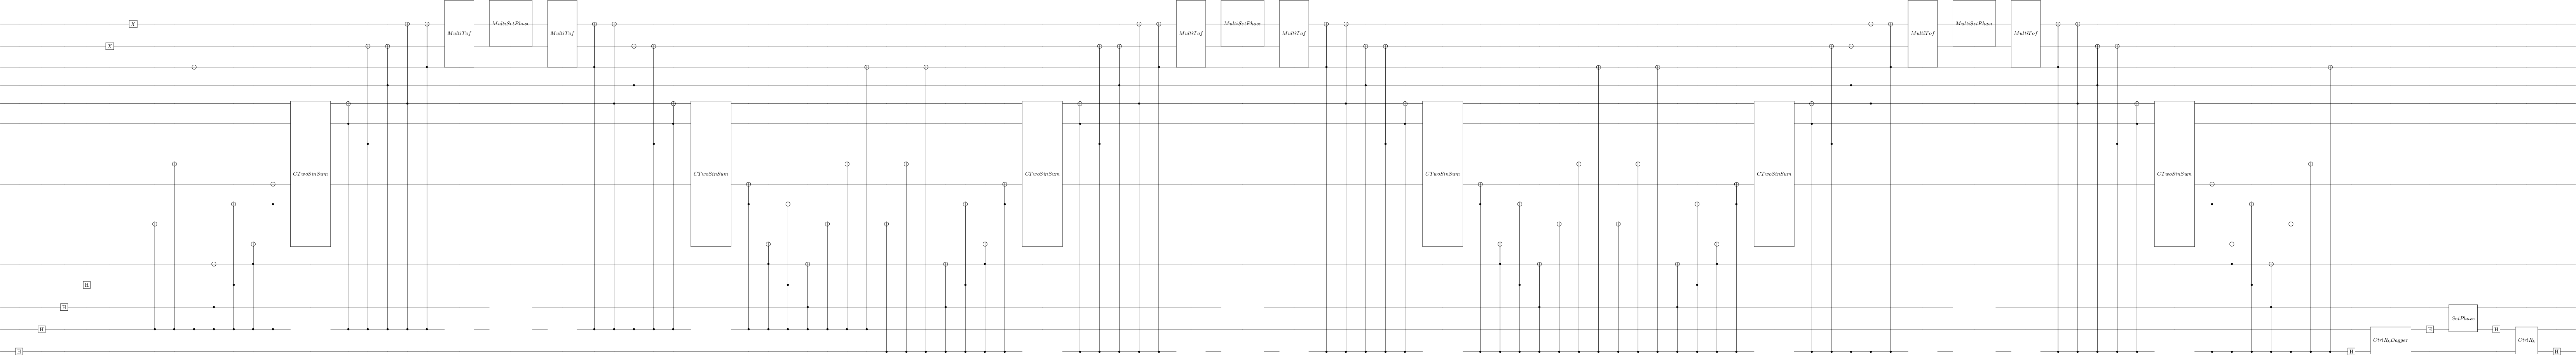

In [12]:
# Create a quantum circuit
qc = QubitCircuit(n_qubits)




# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "TwoSinSum":TwoSinSum,
                 "CTwoSinSum":CTwoSinSum,
                 "C3BitsTwoSinSum":C3BitsTwoSinSum}


# Set Hadamard Gates for PE 's phase registers & superpositions

for i in range(n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])

# Ancilla qubit initialization
qc.add_gate("X", targets=[n_qubits-3])
qc.add_gate("X", targets=[n_qubits-2])

# Set Phase Estimation



for i in range(n_PE):
    times_to_run = 2 ** i

    for _ in range(times_to_run):
        
        for j in range(0,len(data)):
            
            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )
            input_sin_unit(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,5,6,8,9,10,11,12], CSum= CSum, threebitresult_index =  n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubits=n_qubits, phase_add=(2*np.pi)*(0.125))
            #input_sin_unit(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           #sinsum_set=[n_PE-1-i,4,5,6,7,8,9,10,11,12,13], CSum= CSum, fourbitresult_index= n_PE + n_weight + n_input, 
                           #n_PE=n_PE, n_qubit=n_qubits, phase_add=(2*np.pi)*(0.5))
            

            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )


# IQFT part
initial = 0
while initial <= n_PE-1:        
    apply_iqft(qc, start_qubit= 0, end_qubit= initial)
    initial = initial + 1


# Oracle part
qc.add_gate("SetPhase", targets=[n_PE-1, n_PE], arg_value=((2*np.pi)*(0.5)))

# PE_dagger starts here!

# QFT part
initial_2 = 0
while initial_2 <= n_PE-1: 
    apply_iqft_inverse(qc, start_qubit= n_PE - 1 - initial_2, end_qubit= 0)
    initial_2 = initial_2 + 1

qc.png




C:\Users\43491\AppData\Local\Temp\ipykernel_25480\1099200167.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(n_qubits)


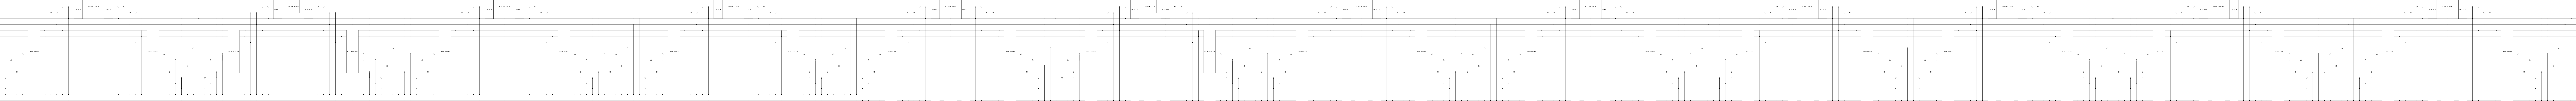

In [25]:
# Create a quantum circuit
qc = QubitCircuit(n_qubits)




# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "TwoSinSum":TwoSinSum,
                 "CTwoSinSum":CTwoSinSum,
                 "C3BitsTwoSinSum":C3BitsTwoSinSum}



qc.png

In [ ]:


initial_state = qt.tensor([qt.basis(2, 0) for _ in range(n_qubits)])  # n_qubits is the total number of qubits in the circuit
print(initial_state)
final_state = qc.run(state= initial_state)
print("final state 1 is {}".format(final_state))
initial_state2 = final_state
reduced_state = final_state.ptrace([0,1])  # Gets the reduced state for qubits 0 and 1
print("before oracle{}".format(reduced_state))

C:\Users\43491\AppData\Local\Temp\ipykernel_21832\3769824318.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc = QubitCircuit(n_qubits)


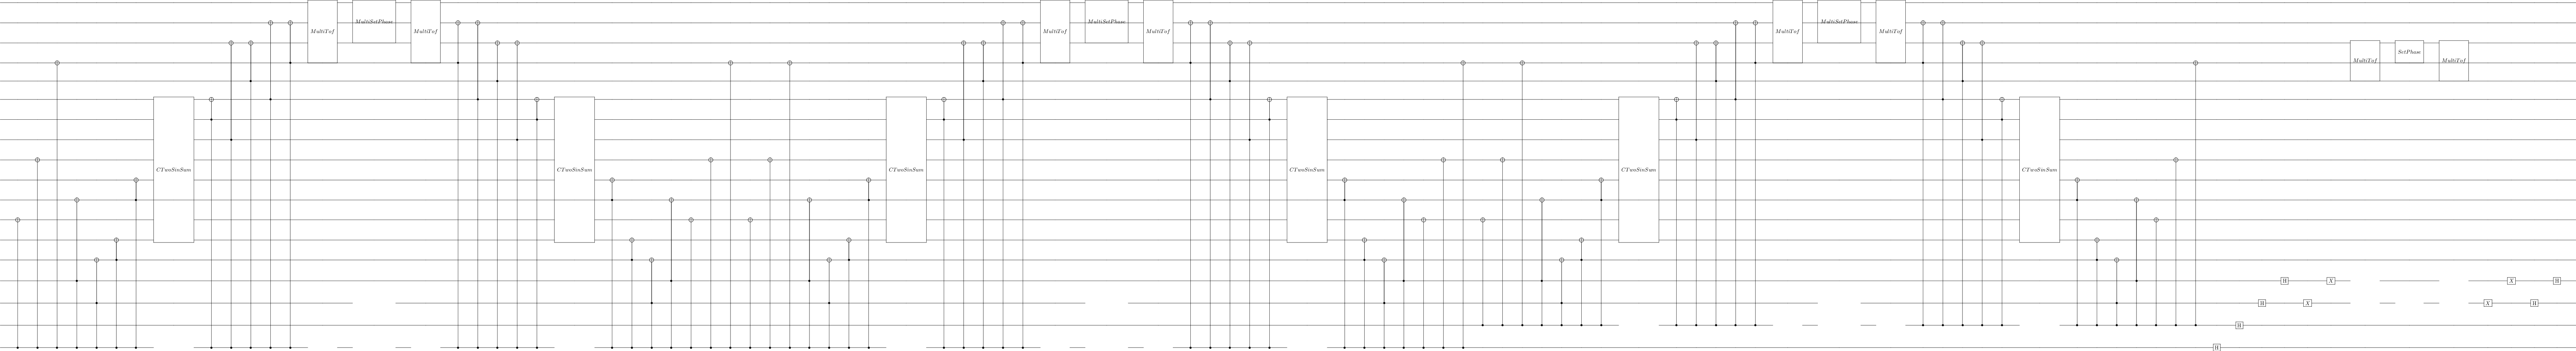

In [13]:
# Create a quantum circuit
qc = QubitCircuit(n_qubits)




# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "TwoSinSum":TwoSinSum,
                 "CTwoSinSum":CTwoSinSum,
                 "C3BitsTwoSinSum":C3BitsTwoSinSum}





# Set Inverse Phase Estimation

for i in range(n_PE - 1, -1, -1):
    times_to_run = 2 ** i
    for _ in range(times_to_run):
        for j in range(len(data)-1,-1,-1):
            
            DataEmbed(qc=qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )
            input_sin_inverse_unit(qc=qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,5,6,8,9,10,11,12], CSum= CSum, threebitresult_index =  n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubits=n_qubits, phase_add=(2*np.pi)*(0.125))
            DataEmbed(qc=qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )


# Inverse Hadamard for PE qubits
for i in range(0,n_PE):
    qc.add_gate("SNOT", targets=[i])




# Diffusion operator

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])
    
for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])
    
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-3], arg_value= n_weight)    
qc.add_gate("SetPhase", targets=[n_qubits-3,n_PE], arg_value=(np.pi))
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-3], arg_value= n_weight)    

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])



qc.png

# May be helpful (not used in code)

C:\Users\43491\AppData\Local\Temp\ipykernel_2200\2703470333.py:2: DeprecationWarning: Importing functions/classes of the qip submodule directly from the namespace qutip is deprecated. Please import them from the submodule instead, e.g.
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit

  qc2 = QubitCircuit(n_qubits)


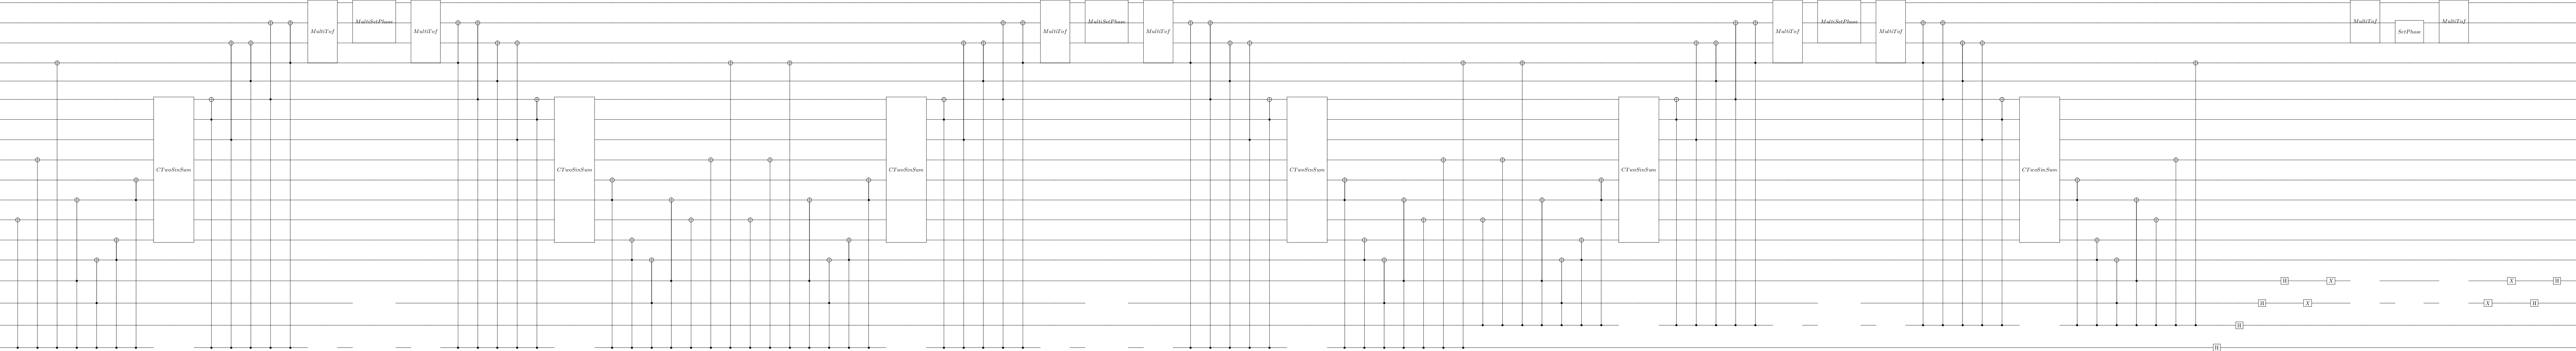

In [33]:
# Create a quantum circuit
qc2 = QubitCircuit(n_qubits)




# User gates defined
qc2.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "TwoSinSum":TwoSinSum,
                 "CTwoSinSum":CTwoSinSum,
                 "C3BitsTwoSinSum":C3BitsTwoSinSum}

# Set Inverse Phase Estimation

for i in range(n_PE - 1, -1, -1):
    times_to_run = 2 ** i
    for _ in range(times_to_run):
        for j in range(len(data)-1,-1,-1):
            
            DataEmbed(qc=qc2, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )
            input_sin_inverse_unit(qc=qc2, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,5,6,8,9,10,11,12], CSum= CSum, threebitresult_index =  n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubits=n_qubits, phase_add=(2*np.pi)*(0.5))
            DataEmbed(qc=qc2, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, input_starting_index = n_PE + n_weight, 
                      target_starting_index= n_PE + n_weight + n_input + n_sum )


# Inverse Hadamard for PE qubits
for i in range(0,n_PE):
    qc2.add_gate("SNOT", targets=[i])

# Diffusion operator

for i in range(n_PE, n_PE + n_weight):
    qc2.add_gate("SNOT", targets=[i])
    
for i in range(n_PE, n_PE + n_weight):
    qc2.add_gate("X", targets=[i])
    
qc2.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-1], arg_value= n_weight)    
qc2.add_gate("SetPhase", targets=[n_qubits-2,n_PE], arg_value=(np.pi))
qc2.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-1], arg_value= n_weight)    

for i in range(n_PE, n_PE + n_weight):
    qc2.add_gate("X", targets=[i])

for i in range(n_PE, n_PE + n_weight):
    qc2.add_gate("SNOT", targets=[i])





qc2.png
fig.savefig("latterhalf.png")

In [ ]:

#qc.png


In [ ]:


input_sin_unit(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3], applyto_qubit_set=[4,7], 
                           sinsum_set=[n_PE-1-i,4,5,6,7,8,9,10,11,12,13], CSum= CSum, fourbitresult_index= n_PE + n_weight + n_input, 
                           n_PE=n_PE, n_qubit=n_qubits, phase_add=(2*np.pi)*(0.25))
            
initial_state = qt.tensor([qt.basis(2, 0) for _ in range(n_qubits)])  # n_qubits is the total number of qubits in the circuit
print(initial_state)
final_state = qc.run(state= initial_state)
reduced_state = final_state.ptrace(n_qubits-1)  # Gets the reduced state for qubits 0 and 1
print(reduced_state)

In [ ]:

import numpy as np


# Simulate the circuit using propagators which should be more memory efficient
U_circuit = qc.propagators()
print(U_circuit)
# Initial state (|00⟩ for ancilla and |111⟩ for target)
initial_state = qt.basis(2**n_qubits, 0).unit()

# Use a loop to apply the gates, avoid creating a large unitary matrix
state = initial_state
#for gate in U_circuit:
    #state = gate * state

# Trace out all qubits except for the first two to get the reduced density matrix
rho = state.ptrace([0, 1])

# Compute probabilities from the reduced density matrix
probabilities = [rho.matrix_element(qt.basis(2, i), qt.basis(2, i)).real for i in range(2)]

print("Probabilities of the first two qubits are: ", probabilities)


qc.png

In [ ]:
U_circuit = qc.propagators()
print(len(U_circuit))
# Initial state (|00⟩ for ancilla and |111⟩ for target)
initial_state = basis(2**n_qubits,0)

# Final state after the circuit
U_acu = np.identity(2**n_qubits)
for i in range(len(U_circuit)):
    U_acu = np.dot(U_circuit[i],U_acu)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #check_state = np.dot(U_acu,initial_state)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #prob = get_combined_qubit_probabilities(state_vector=check_state, qubit_indices=[0,1,2,3,4])
    #print("At {} gate the state is {}".format(i+1,prob))
final_state = np.dot(U_acu,initial_state)
#print(final_state)


# Complete state vector for a 6-qubit system
state_vector = final_state

# Qubit indices for which we want the probabilities
qubit_indices = [0,1]

# Calculate the probabilities
probabilities = get_combined_qubit_probabilities(state_vector, qubit_indices)
print("The phase estimation gives: {}".format(probabilities))

In [ ]:

qc.add_gate("X", targets=[0])
qc.add_gate("X", targets=[6])
qc.add_gate("X", targets=[3])
qc.add_gate("X", targets=[1])
qc.add_gate("X", targets=[2])
#qc.add_gate("CMultiSum", targets=[0, 1, 2, 3], arg_value="11")
qc.add_gate("C3BitsTwoSinSum", targets=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], arg_value= CSum)

n_qubits=11
U_circuit = qc.propagators()
print(len(U_circuit))
# Initial state (|00⟩ for ancilla and |111⟩ for target)
initial_state = basis(2**n_qubits,0)

# Final state after the circuit
U_acu = np.identity(2**n_qubits)
for i in range(len(U_circuit)):
    U_acu = np.dot(U_circuit[i],U_acu)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #check_state = np.dot(U_acu,initial_state)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #prob = get_combined_qubit_probabilities(state_vector=check_state, qubit_indices=[0,1,2,3,4])
    #print("At {} gate the state is {}".format(i+1,prob))
final_state = np.dot(U_acu,initial_state)
#print(final_state)


# Complete state vector for a 6-qubit system
state_vector = final_state

# Qubit indices for which we want the probabilities
qubit_indices = [7,8,9,10]

# Calculate the probabilities
probabilities = get_combined_qubit_probabilities(state_vector, qubit_indices)
print("The best weight gives: {}".format(probabilities))





In [ ]:
# Create a quantum circuit
qc = QubitCircuit(n_qubits)
# User gates defined
qc.user_gates = {"CtrlR_kDagger":CTRL_Rk_dagger,
                 "CtrlR_k":CTRL_Rk,
                 "CHadamard":CHadamard,
                 "SetPhase":SetPhase,
                 "MultiTof":MultiTof,
                 "MultiSetPhase":Multi_SetPhase,
                 "CMultiSum":CMultiSum,
                 "CMultiVariSum":CMultiVariSum}




# IQFT part
initial = 0
while initial <= n_PE-1:        
    apply_iqft(qc, start_qubit= 0, end_qubit= initial)
    initial = initial + 1


U_circuit = qc.propagators()
print(len(U_circuit))
# Initial state (|00⟩ for ancilla and |111⟩ for target)
initial_state = basis(2**n_qubits,0)

# Final state after the circuit
U_acu = np.identity(2**n_qubits)
for i in range(len(U_circuit)):
    U_acu = np.dot(U_circuit[i],U_acu)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #check_state = np.dot(U_acu,initial_state)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #prob = get_combined_qubit_probabilities(state_vector=check_state, qubit_indices=[0,1,2,3,4])
    #print("At {} gate the state is {}".format(i+1,prob))
final_state = np.dot(U_acu,initial_state)
#print(final_state)


# Complete state vector for a 6-qubit system
state_vector = final_state

# Qubit indices for which we want the probabilities
qubit_indices = [0,1]

# Calculate the probabilities
probabilities = get_combined_qubit_probabilities(state_vector, qubit_indices)
print("The phase estimation gives: {}".format(probabilities))
# Oracle part
qc.add_gate("SetPhase", targets=[n_PE-1, n_PE], arg_value=((2*np.pi)*(0.5)))

# PE_dagger starts here!

# QFT part
initial_2 = 0
while initial_2 <= n_PE-1: 
    apply_iqft_inverse(qc, start_qubit= n_PE - 1 - initial_2, end_qubit= 0)
    initial_2 = initial_2 + 1

# Set Inverse Phase Estimation

for i in range(n_PE - 1, -1, -1):
    times_to_run = 2 ** i
    for _ in range(times_to_run):
        for j in range(len(data)-1,-1,-1):
            
            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, starting_index= n_PE + n_weight)
            input_unit_inverse(qc, pe_qubit_index= n_PE-1-i, control_qubit_set=[2,3],applyto_qubit_set=[4,5], output_qubit_index=6,n_PE= n_PE, 
                               phase_add=(2*np.pi)*(0.25), limit= limit)
            DataEmbed(qc, PE_index=n_PE-1-i, input_target=data[j], num_output= n_output, starting_index= n_PE + n_weight)

# Inverse Hadamard for PE qubits
for i in range(0,n_PE):
    qc.add_gate("SNOT", targets=[i])








# Diffusion operator
for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])
    
for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])
    
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-1], arg_value= n_weight)    
qc.add_gate("SetPhase", targets=[n_qubits-1,n_qubits-2], arg_value=(np.pi))
qc.add_gate("MultiTof", targets=list(range(n_PE,n_PE+ n_weight))+ [n_qubits-1], arg_value= n_weight)    

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("X", targets=[i])

for i in range(n_PE, n_PE + n_weight):
    qc.add_gate("SNOT", targets=[i])


U_circuit = qc.propagators()
print(len(U_circuit))
# Initial state (|00⟩ for ancilla and |111⟩ for target)
initial_state = basis(2**n_qubits,0)

# Final state after the circuit
U_acu = np.identity(2**n_qubits)
for i in range(len(U_circuit)):
    U_acu = np.dot(U_circuit[i],U_acu)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #check_state = np.dot(U_acu,initial_state)
    #print("At {} gate the state is {}".format(i+1,np.dot(U_acu,initial_state)))
    #prob = get_combined_qubit_probabilities(state_vector=check_state, qubit_indices=[0,1,2,3,4])
    #print("At {} gate the state is {}".format(i+1,prob))
final_state = np.dot(U_acu,initial_state)
#print(final_state)


# Complete state vector for a 6-qubit system
state_vector = final_state

# Qubit indices for which we want the probabilities
qubit_indices = [2,3]

# Calculate the probabilities
probabilities = get_combined_qubit_probabilities(state_vector, qubit_indices)
print("The best weight gives: {}".format(probabilities))




qc.png